<a id='intro'></a>
## Tmdb Movie Analysis

### Description 

> For this project, i will be exploring the **TMDB movies data set**. The objective of this analysis is to answer questions about:  


### Questions for Analysis
> Which production company produced the popular movies

> Which genres are the most popular from year to year

> Which genres earned the most revenue from year to year

> Whether high budget movies earn more revenue that lower budget movies

In [1]:
# The code below imports all the modules that will be needed in this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Upgrades pandas in case i need dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
df = pd.read_csv('tmdb-movies.csv') #importing the csv file into the notebook
df.head() #Trying to see how the data looks like for the first five rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#the code below is to get an overview about the datatypes in this dataset, summary statistics and the shape
df.info()
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In order to answer the questions i have posed pre-analysis, i do not think i need some columns such as the id, website and tagline columns. These are dropped using the code below:

In [5]:
df.columns
print(df.dtypes) #To see the columns in the dataset and its properties

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [6]:
df.drop(['id', 'imdb_id', 'cast', 'keywords',  'homepage', 'tagline', 'overview'], axis = 1, inplace = True )
df.head() #The columns left below are all that is needed for this analysis'

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace = True) #To drop duplicates

In [8]:
df.duplicated().sum() #To check that the code above to drop duplicates that may be in the data above successfully ran

0

It is important that we check for Null values that could affect the results of the analysis.


In [9]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

From the output above, there are three columns with null values that needs addressing. Since the affected columns contain categorical data, we can return undefined for each occurrence of null values in the dataset. Lets use fillna to achieve this

In [10]:
df.director.fillna('undefined director', inplace = True)
df.genres.fillna('undefined genre', inplace = True)
df.production_companies.fillna('undefined production company', inplace = True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Additionally, i would like to check if there are values in the quantitative columns that are equal to zero. Depending on the column with which the value is located, we may need to drop these rows.

In [11]:
count_zero = (df == 0).sum()
count_zero

popularity                 0
budget                  5696
revenue                 6016
original_title             0
director                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

Rows where revenue, budget and the adjusted columns of these values are = 0 are not very useful for the purpose of this analysis. I dropped them using the function below. There is no need to drop rows with zero runtime as we can answer the questions in this analysis entirely without considering the run time. The rows have dropped from 10,866 rows to 3854 rows

In [12]:
df.drop(df[df['revenue'] == 0].index,inplace = True)
df.drop(df[df['budget'] == 0].index,inplace = True)
df.drop(df[df['budget_adj'] == 0].index,inplace = True)
df.drop(df[df['revenue_adj'] == 0].index,inplace = True)
df.shape

(3854, 14)

To answer the questions in this analysis, i would need to add some new columns. For example, movies have multiple genres listed and all i need is the main genre. This is the same with the production company. Also i may need to create a seperate column for profit to understand better the relationship between budget and revenue.

In [13]:
df['main_genre'] = df.genres.str.split(pat = '|', expand = True)[0]
df['main_production_company'] = df.production_companies.str.split(pat = '|', expand = True)[0]
df['profit'] = df.revenue_adj - df.budget_adj
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_production_company,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios,1.254446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Village Roadshow Pictures,2.101614e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Summit Entertainment,1.704191e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Lucasfilm,1.718723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Universal Pictures,1.210949e+09


I will now drop the budget and revenue columns as i will be working with the adjusted budget and revenue only. Additionally, i only need to work with the main genre, so i will be dropping the genre column.

In [14]:
df.drop(['budget', 'revenue', 'genres'], axis = 1, inplace = True)
df.head()

,popularity,original_title,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,main_production_company,profit
0,32.985763,Jurassic World,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios,1.254446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Village Roadshow Pictures,2.101614e+08
2,13.112507,Insurgent,Robert Schwentke,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Summit Entertainment,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Lucasfilm,1.718723e+09
4,9.335014,Furious 7,James Wan,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Universal Pictures,1.210949e+09


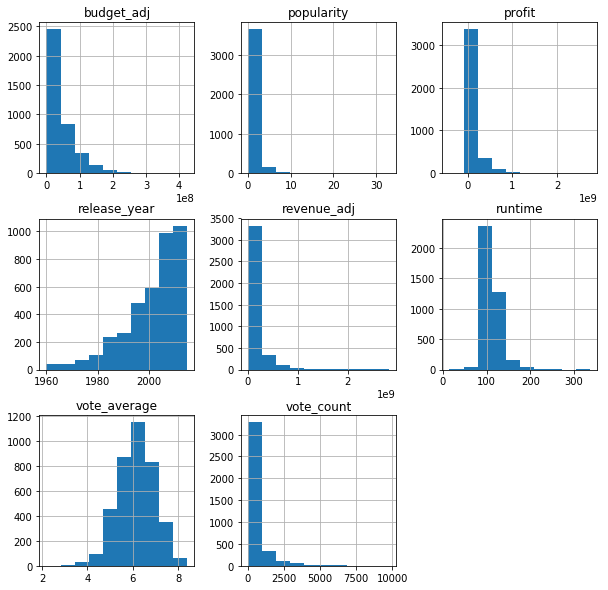

In [15]:
#The code below is to get an overall view of the distribution of the data in each column.
df.hist(figsize = (10,10));

#From the histograms below, there appears to be no consipicuos outliers across our dataset although each chart has different properties.

It appears that our data set contains more movies in the current millenium, rather than movies from the 60's, 80's and 90's. The vote average appears to be normally distributed

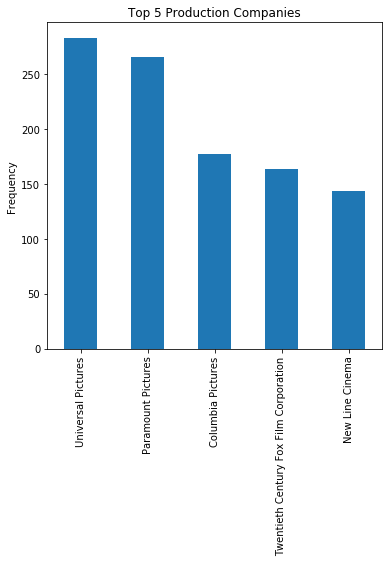

In [16]:
# I would attempt to answer the first question - Which production company produced the most movies. 
# Below i used the value count function to find which production companies appear the most as the main production company in our dataset
popular_companies = df['main_production_company'].value_counts()
popular_companies.head().plot(kind = 'bar', title = 'Top 5 Production Companies', figsize = (6,6));
plt.ylabel('Frequency');


It appears that universal pictures is the most frequent main production company in out dataset, closely followed by paramount and columbia pictures with twentieth century fox and new line cinema rounding off the top 5

# Question 2

Which genres are the most popular from year to year across the data set? My approach is to find the mean popularity rating for each unique genre across the data set

In [17]:
df.groupby('main_genre')['popularity'].mean()

main_genre
Action             1.442326
Adventure          1.905525
Animation          1.712723
Comedy             0.914765
Crime              1.074895
Documentary        0.289461
Drama              0.927571
Family             1.609295
Fantasy            1.581660
History            1.442235
Horror             0.855787
Music              0.914098
Mystery            1.133780
Romance            1.369972
Science Fiction    1.931437
TV Movie           0.273628
Thriller           1.171430
War                1.658497
Western            1.193918
Name: popularity, dtype: float64

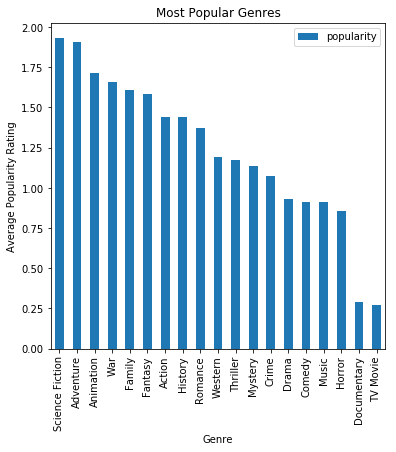

In [18]:
#Lets sort this and plot on a bar graph so we can easily spot the most popular genre
#First i converted the series object from above to a data frame, reset the index and then use sort_values to arrange in ascending order
df_genre_popularity = df.groupby('main_genre')['popularity'].mean()
df_genre_popularity = df_genre_popularity.to_frame()
df_genre_popularity.reset_index(inplace = True)
df_genre_popularity.sort_values('popularity', ascending = False).plot(x = 'main_genre', y = 'popularity', kind = 'bar', title = 'Most Popular Genres', figsize = (6,6));
plt.ylabel('Average Popularity Rating')
plt.xlabel("Genre");

From the above, science fiction appears to be the most popular genre.

To answer the question on which genre earned the most revenue, lets find the total revenue for each genre

In [19]:
df_genre_revenue = df.groupby('main_genre').revenue_adj.sum()
df_genre_revenue = df_genre_revenue.to_frame()
df_genre_revenue.reset_index(inplace = True)
df_genre_revenue.sort_values('revenue_adj', ascending = False)


,main_genre,revenue_adj
0,Action,1.120676e+11
1,Adventure,9.550580e+10
6,Drama,8.095819e+10
3,Comedy,7.917396e+10
2,Animation,3.048636e+10
10,Horror,2.166199e+10
8,Fantasy,2.137622e+10
14,Science Fiction,2.128272e+10
4,Crime,1.682894e+10
16,Thriller,1.457446e+10


Lets plot a bar chart to visualize the revenue for each genre

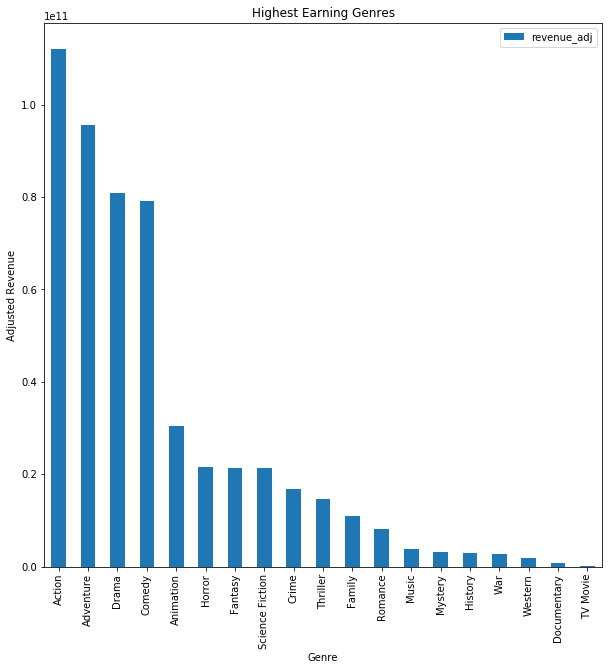

In [20]:
df_genre_revenue.sort_values('revenue_adj', ascending = False).plot(x = 'main_genre', y = 'revenue_adj', kind = 'bar', title = "Highest Earning Genres", figsize = (10, 10));
plt.ylabel('Adjusted Revenue')
plt.xlabel('Genre');

The Action genre appears to raked in the highest revenue over the years.

Finally, lets find out if higher budget translates to higher revenue. A scatter graph can help us understand the correlation between these two variables

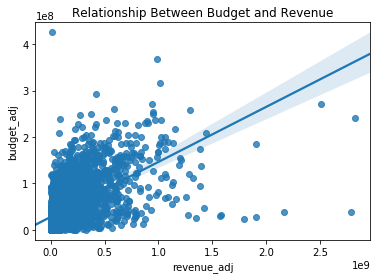

In [21]:
def scatter_reg():
    sns.regplot(data = df, x = 'revenue_adj', y = 'budget_adj')
    plt.title('Relationship Between Budget and Revenue');
    
scatter_reg()

There appears to be a strong correlation between budget and revenue, as budget increases, the revenue made from the movie also increases!

<a id='conclusions'></a>
## Conclusions

> This analysis attempted to answer all of the questions raised at the beginning of this analysis. 

Universal pictures appear to be most involved in the production of movies hence are most popular. However, it is important to note that only the main production company for each movie were considered during this analysis as others were dropped

Going by the popularity ratings, Sci-fi movies had the highest popularity ratings on average. However it is important to note that i could have also used the count of each movie genre( frequency of appearances in the dataset) to come to a conclusion instead of using the mean of the popularity rating for each movie genre.

Action movies generated the most revenue. However, a lot of rows were dropped at the beginning of this analysis that included movies with budget and revenue equals to zero. These could have been to due to some error as the number of rows(movies) with zero budget and revenue were a lot.

There is a strong positive correlation between budget and revenue. However further tests, through the use of inferential statistics may be neccessary to arrive at a suitable conclusion.

## Limitations

1. About 70% of the original dataset were dropped as a result of zero values being recorded for budget and revenue for some entries. These rows were not useful in answering the questions posed at the beginning of this analysis.
2. Inferential statistics were not computed to gain further insights and make predictions based on the data. There is room for further analysis in this area.

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0